In [1]:
#Generate forecasts for Stocks:
#1. NASDAQ.AAPL
#2. NASDAQ.ADP
#3. NASDAQ.CBOE
#4. NASDAQ.CSCO
#5. NASDAQ.EBAY

#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import dateutil.parser
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#Read the stock data
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
#Convert to datetime type from timestamp
df1 = df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['DATE'] = df1
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 19:00:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 19:01:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 19:02:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 19:03:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 19:04:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
#Group the dataset by Date
df1 = df.groupby('DATE')['NASDAQ.AAL'].mean().reset_index()

In [5]:
df1.head()

,DATE,NASDAQ.AAL
0,2017-04-03 19:00:00,42.3300
1,2017-04-03 19:01:00,42.3600
2,2017-04-03 19:02:00,42.3100
3,2017-04-03 19:03:00,42.3700
4,2017-04-03 19:04:00,42.5378


In [6]:
#Sort the Date column and set it as index
df1 = df1.sort_values('DATE')
df1 = df1.set_index('DATE')
df1.index

DatetimeIndex(['2017-04-03 19:00:00', '2017-04-03 19:01:00',
               '2017-04-03 19:02:00', '2017-04-03 19:03:00',
               '2017-04-03 19:04:00', '2017-04-03 19:05:00',
               '2017-04-03 19:06:00', '2017-04-03 19:07:00',
               '2017-04-03 19:08:00', '2017-04-03 19:09:00',
               ...
               '2017-09-01 01:21:00', '2017-09-01 01:22:00',
               '2017-09-01 01:23:00', '2017-09-01 01:24:00',
               '2017-09-01 01:25:00', '2017-09-01 01:26:00',
               '2017-09-01 01:27:00', '2017-09-01 01:28:00',
               '2017-09-01 01:29:00', '2017-09-01 01:30:00'],
              dtype='datetime64[ns]', name='DATE', length=41266, freq=None)

In [7]:
#Create the Series for NASDAQ.AAL
aal = pd.Series(df1['NASDAQ.AAL'])

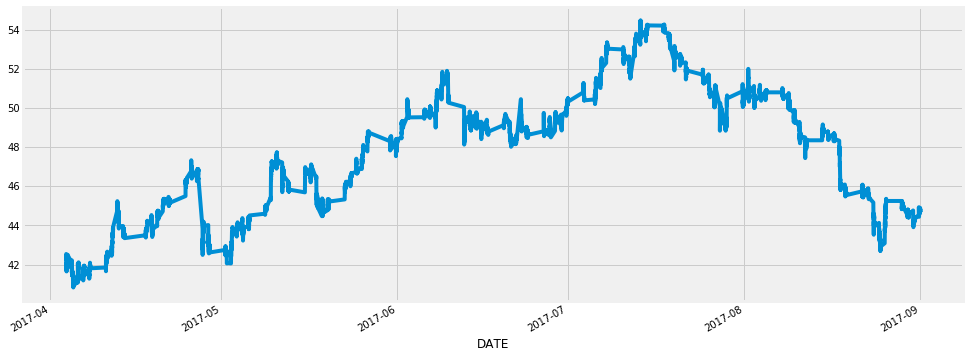

In [8]:
##Graphically test stationarity
columns = ['NASDAQ.AAL','NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO', 'NASDAQ.EBAY']

aal.plot(figsize=(15, 6))
plt.show()
    
#From graph it is visible that the series is not stationary

In [9]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 390, center = False).mean()
    rol_std = ts.rolling(window = 390, center = False).std()

    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel('Time in Days', fontsize = 10)
    plt.ylabel('Stock Price', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show()

In [10]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag='AIC')
    print(ts_test)
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
#Test stationarity using Adfuller test
TestStationaryAdfuller(aal)

#The results show that the Series is not stationary

(-1.7286400656343166, 0.4164199251852731, 46, 41219, {'1%': -3.4305086575920356, '5%': -2.86161012306808, '10%': -2.566807324247269}, -142642.5838569553)
Test Statistic                    -1.728640
p-value                            0.416420
#Lags Used                        46.000000
Number of Observations Used    41219.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


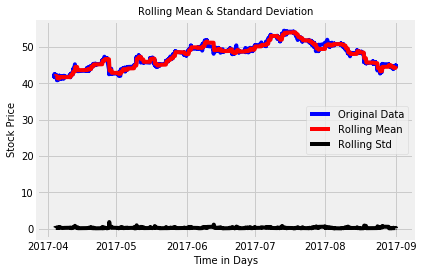

In [14]:
TestStationaryPlot(aal)

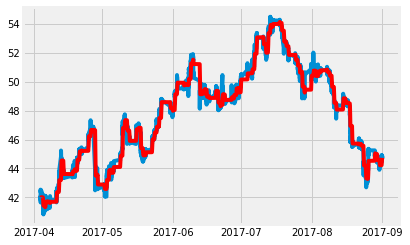

In [15]:
#Estimate or model trend and then remove it from the time series 
#1.Moving Average
moving_avg = aal.rolling(390).mean()
plt.plot(aal)
plt.plot(moving_avg, color='red')

In [16]:
mte_moving_avg_diff = aal - moving_avg
mte_moving_avg_diff.head(390)

DATE
2017-04-03 19:00:00         NaN
2017-04-03 19:01:00         NaN
2017-04-03 19:02:00         NaN
2017-04-03 19:03:00         NaN
2017-04-03 19:04:00         NaN
2017-04-03 19:05:00         NaN
2017-04-03 19:06:00         NaN
2017-04-03 19:07:00         NaN
2017-04-03 19:08:00         NaN
2017-04-03 19:09:00         NaN
2017-04-03 19:10:00         NaN
2017-04-03 19:11:00         NaN
2017-04-03 19:12:00         NaN
2017-04-03 19:13:00         NaN
2017-04-03 19:14:00         NaN
2017-04-03 19:15:00         NaN
2017-04-03 19:16:00         NaN
2017-04-03 19:17:00         NaN
2017-04-03 19:18:00         NaN
2017-04-03 19:19:00         NaN
2017-04-03 19:20:00         NaN
2017-04-03 19:21:00         NaN
2017-04-03 19:22:00         NaN
2017-04-03 19:23:00         NaN
2017-04-03 19:24:00         NaN
2017-04-03 19:25:00         NaN
2017-04-03 19:26:00         NaN
2017-04-03 19:27:00         NaN
2017-04-03 19:28:00         NaN
2017-04-03 19:29:00         NaN
                         ...   
201

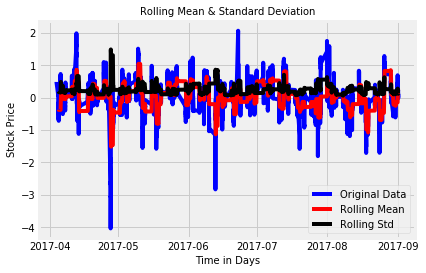

(-9.223566866620429, 1.753464240494743e-15, 46, 40830, {'1%': -3.430510169266885, '5%': -2.861610791176152, '10%': -2.5668076798627837}, -141470.83418573634)
Test Statistic                -9.223567e+00
p-value                        1.753464e-15
#Lags Used                     4.600000e+01
Number of Observations Used    4.083000e+04
Critical Value (1%)           -3.430510e+00
Critical Value (5%)           -2.861611e+00
Critical Value (10%)          -2.566808e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [17]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)
TestStationaryAdfuller(mte_moving_avg_diff)

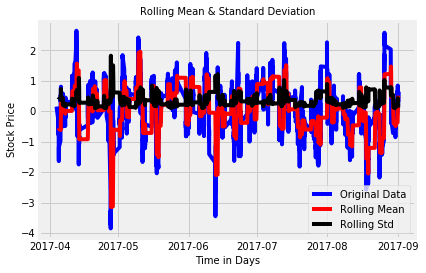

(-6.994861108947831, 7.579456706845272e-10, 46, 40829, {'1%': -3.4305101731900605, '5%': -2.8616107929100596, '10%': -2.5668076807856948}, -112959.04290542682)
Test Statistic                -6.994861e+00
p-value                        7.579457e-10
#Lags Used                     4.600000e+01
Number of Observations Used    4.082900e+04
Critical Value (1%)           -3.430510e+00
Critical Value (5%)           -2.861611e+00
Critical Value (10%)          -2.566808e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [18]:
mte_first_difference = aal - aal.shift(390) 
TestStationaryPlot(mte_first_difference)
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

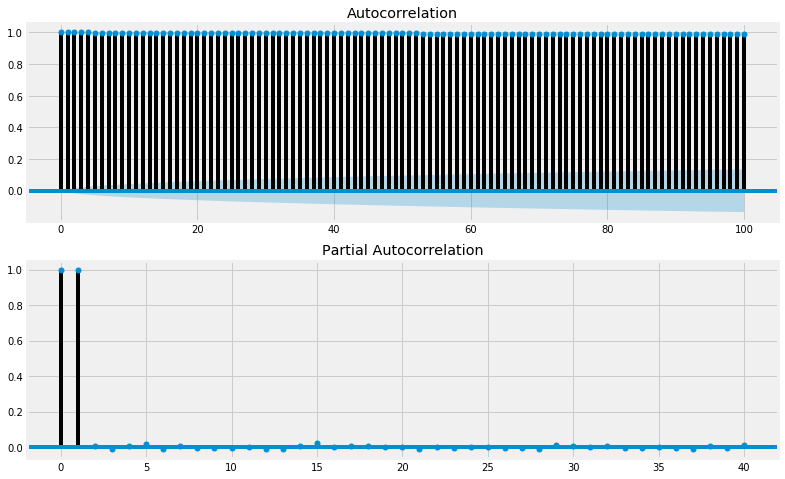

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(aal.values.squeeze(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(aal, lags=40, ax=ax2)

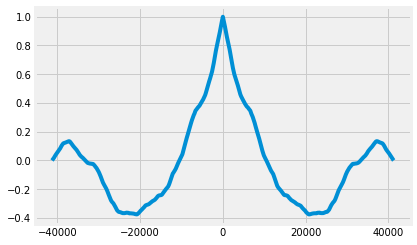

C:\Users\nkanodia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


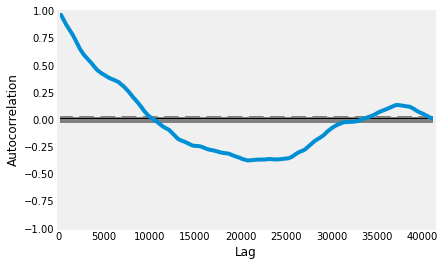

In [20]:
from pandas.tools.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
df1['NASDAQ.AAL_2'] = df1['NASDAQ.AAL']
df1['NASDAQ.AAL_2'] = (df1['NASDAQ.AAL_2'] - df1['NASDAQ.AAL_2'].mean()) / (df1['NASDAQ.AAL_2'].std())
plt.acorr(df1['NASDAQ.AAL_2'],maxlags = len(df1['NASDAQ.AAL_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(df1['NASDAQ.AAL'])
plt.show()

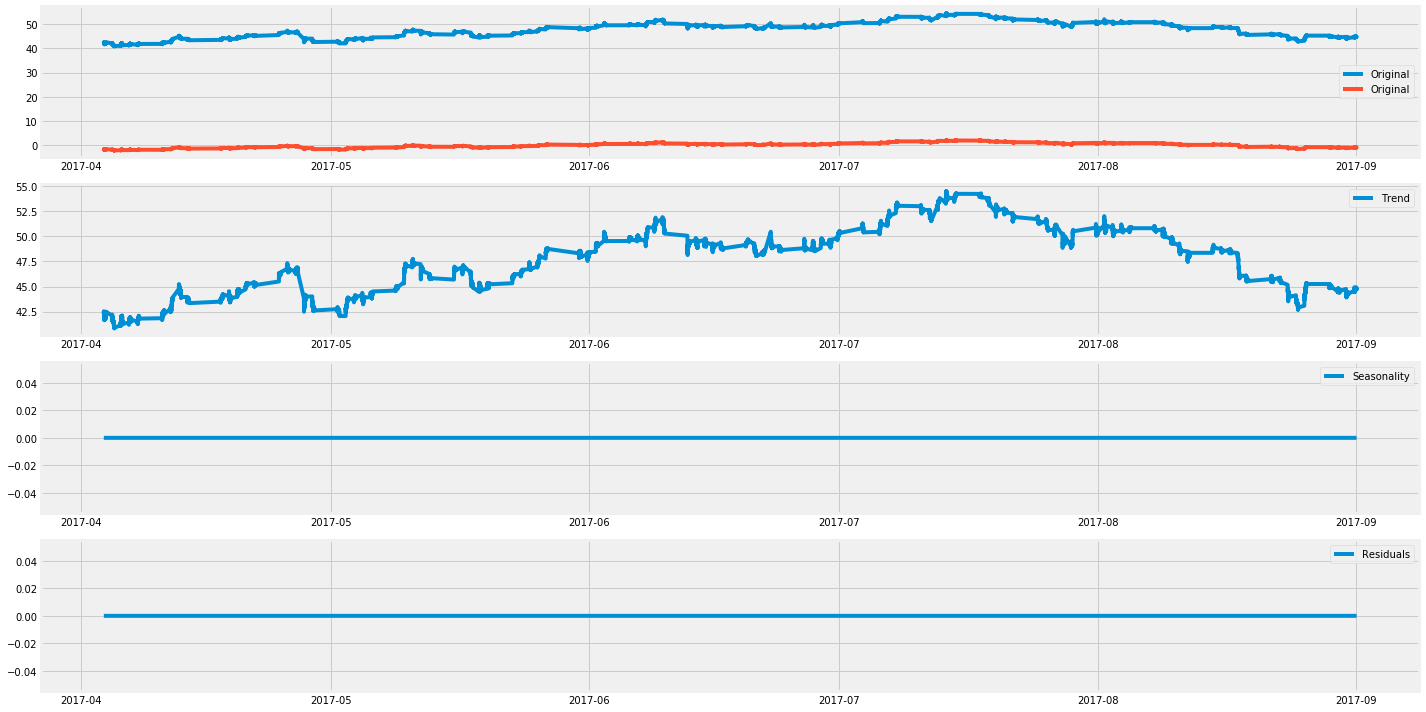

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
aal.index
decomposition = seasonal_decompose(aal, freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#The plot shows there is no seasonality component

In [22]:
aal.dropna(inplace = True)
train = aal.loc['2017-04-03':'2017-08-19']
test = aal.loc['2017-08-20':]

In [25]:
df1['logAAL'] = np.log(df1['NASDAQ.AAL'])
df1['diflogAAL'] = df1['logAAL']  - df1['logAAL'].shift(periods = -1)
df1 = df1.dropna()
df1

,NASDAQ.AAL,NASDAQ.AAL_2,logAAL,diflogAAL
DATE,,,,
2017-04-03 19:00:00,42.3300,-1.650114,3.745496,-0.000708
2017-04-03 19:01:00,42.3600,-1.640910,3.746205,0.001181
2017-04-03 19:02:00,42.3100,-1.656251,3.745023,-0.001417
2017-04-03 19:03:00,42.3700,-1.637842,3.746441,-0.003953
2017-04-03 19:04:00,42.5378,-1.586360,3.750393,-0.000049
2017-04-03 19:05:00,42.5399,-1.585716,3.750442,0.001645
2017-04-03 19:06:00,42.4700,-1.607161,3.748798,0.000000
2017-04-03 19:07:00,42.4700,-1.607161,3.748798,0.001885
2017-04-03 19:08:00,42.3900,-1.631706,3.746912,0.001416


In [26]:
data = df[['DATE', 'NASDAQ.AAL', 'logAAL','diflogAAL']][:-100]

KeyError: "['logAAL' 'diflogAAL'] not in index"

In [23]:
train

DATE
2017-04-03 19:00:00    42.3300
2017-04-03 19:01:00    42.3600
2017-04-03 19:02:00    42.3100
2017-04-03 19:03:00    42.3700
2017-04-03 19:04:00    42.5378
2017-04-03 19:05:00    42.5399
2017-04-03 19:06:00    42.4700
2017-04-03 19:07:00    42.4700
2017-04-03 19:08:00    42.3900
2017-04-03 19:09:00    42.3300
2017-04-03 19:10:00    42.4000
2017-04-03 19:11:00    42.2900
2017-04-03 19:12:00    42.2900
2017-04-03 19:13:00    42.3900
2017-04-03 19:14:00    42.4197
2017-04-03 19:15:00    42.4300
2017-04-03 19:16:00    42.4400
2017-04-03 19:17:00    42.4000
2017-04-03 19:18:00    42.3900
2017-04-03 19:19:00    42.4400
2017-04-03 19:20:00    42.3800
2017-04-03 19:21:00    42.3400
2017-04-03 19:22:00    42.2950
2017-04-03 19:23:00    42.2800
2017-04-03 19:24:00    42.2500
2017-04-03 19:25:00    42.2600
2017-04-03 19:26:00    42.2100
2017-04-03 19:27:00    42.2000
2017-04-03 19:28:00    42.1700
2017-04-03 19:29:00    42.1400
                        ...   
2017-08-19 01:01:00    45.5800
201

In [24]:
#Modeling the data
import statsmodels.api as sm
arma_mod20 = sm.tsa.ARMA(mte_first_difference, (1,0)).fit()
print(arma_mod20.params)
print(arma_mod20.summary())
#2017-09-01

r1 = ARIMA(train, order=(1,0,0)).fit()

C:\Users\nkanodia\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: Array must not contain infs or NaNs

In [40]:
r1 = ARIMA(train, order=(1,0,0)).fit()

C:\Users\nkanodia\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
print(aal['2017-04-03 19:03:00'])

In [43]:
#Calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion(BIC), and Hannan-Quinn Information Criterion (HQIC)
#Our goalis to choose a model that minimizes (AIC, BIC, HQIC)
print(r1.aic, r1.bic, r1.hqic)

-129623.0459288998 -129597.42994505583 -129614.91562576847


In [45]:
#Use the Durbin-Watson test for autocorrelation. 
#The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.
sm.stats.durbin_watson(r1.resid.values)

#The Durbin-Watson test shows no autocorrelation.

1.823877190079586

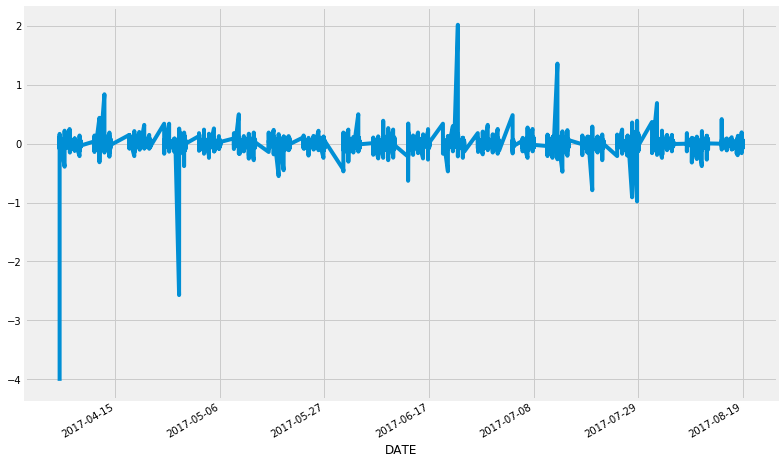

In [46]:
#Show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = r1.resid.plot(ax=ax);

In [47]:
#Calculate the residuals, tests the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot
#resid20 = arma_mod20.resid
resid20 = r1.resid
normaltest(resid20)

NormaltestResult(statistic=79855.96622932158, pvalue=0.0)

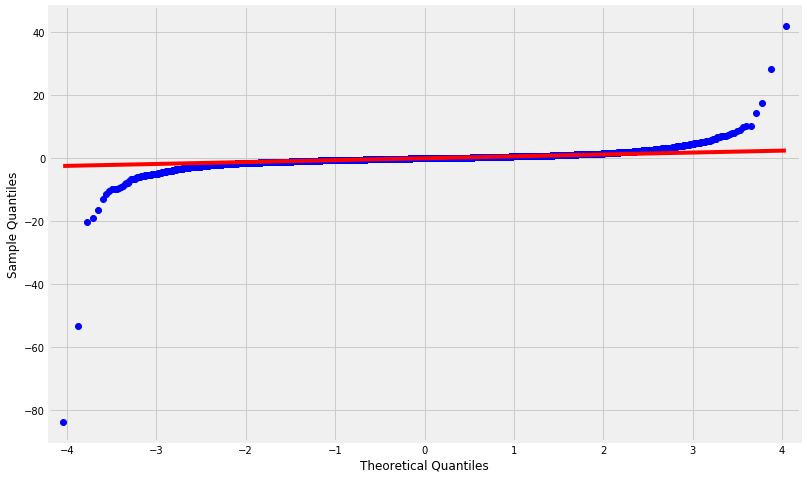

In [48]:
#Show plots in the notebook
from statsmodels.graphics.api import qqplot
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

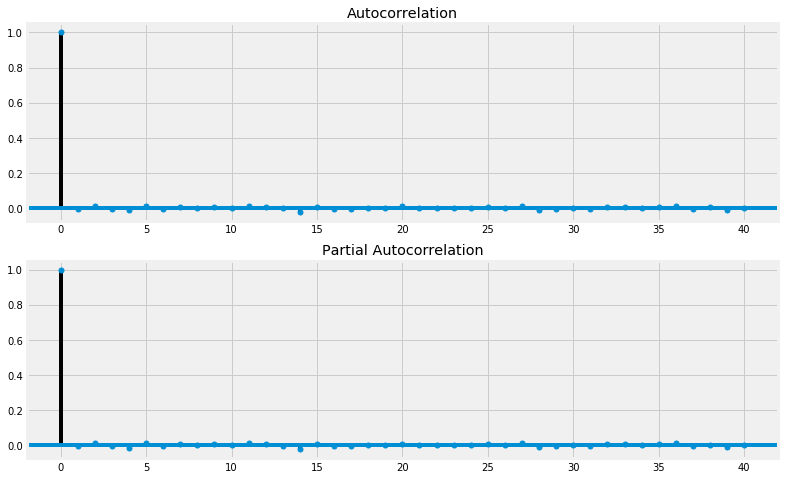

In [49]:
#Model auto-correlation
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(resid20, lags=40, ax=ax2)

In [50]:
#Calculate the lag, autocorrelation (AC), Q statistic and Prob>Q.
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

#The p-values for the Ljung–Box Q test all are well above .05 for lags 1 through 3, indicating “significance.” This is not a desirable result 
#However, the p-values for the remaining lags through 40 data values as less than .05 
#So there is much data not contributing to correlations at high lags

            AC          Q  Prob(>Q)
lag                                
1.0  -0.004629   0.808873  0.368454
2.0   0.013123   7.309752  0.025865
3.0  -0.002974   7.643576  0.053982
4.0  -0.013913  14.951043  0.004804
5.0   0.010141  18.833716  0.002064
6.0  -0.006811  20.584950  0.002178
7.0   0.007546  22.734907  0.001896
8.0   0.000387  22.740549  0.003714
9.0   0.007597  24.919603  0.003061
10.0  0.002800  25.215585  0.004952
11.0  0.010191  29.136886  0.002162
12.0  0.007211  31.100512  0.001902
13.0 -0.002705  31.376824  0.002969
14.0 -0.023426  52.100090  0.000003
15.0  0.004389  52.827513  0.000004
16.0 -0.004382  53.552762  0.000006
17.0 -0.006356  55.078583  0.000007
18.0 -0.000762  55.100486  0.000012
19.0 -0.001108  55.146828  0.000022
20.0  0.009695  58.697185  0.000011
21.0 -0.000679  58.714591  0.000020
22.0  0.002247  58.905314  0.000032
23.0 -0.000871  58.933948  0.000054
24.0  0.000427  58.940825  0.000090
25.0  0.006918  60.748709  0.000082
26.0  0.002599  61.003876  0

In [51]:
#Compute the predictions and analyze their fit against actual values
predict_results = r1.predict(start = len(train), end = len(train)+len(test)-1, dynamic=False)

print(predict_results)

#r1.plot_predict(dynamic=False)

#plt.show()



37747    45.550063
37748    45.550126
37749    45.550189
37750    45.550252
37751    45.550316
37752    45.550379
37753    45.550442
37754    45.550505
37755    45.550568
37756    45.550631
37757    45.550694
37758    45.550757
37759    45.550820
37760    45.550883
37761    45.550946
37762    45.551009
37763    45.551072
37764    45.551136
37765    45.551199
37766    45.551262
37767    45.551325
37768    45.551388
37769    45.551451
37770    45.551514
37771    45.551577
37772    45.551640
37773    45.551703
37774    45.551766
37775    45.551829
37776    45.551892
           ...    
41236    45.742790
41237    45.742838
41238    45.742886
41239    45.742934
41240    45.742982
41241    45.743030
41242    45.743078
41243    45.743127
41244    45.743175
41245    45.743223
41246    45.743271
41247    45.743319
41248    45.743367
41249    45.743415
41250    45.743463
41251    45.743510
41252    45.743558
41253    45.743606
41254    45.743654
41255    45.743702
41256    45.743750
41257    45.

C:\Users\nkanodia\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [52]:
p = predict_results.tolist()
future_forecast = pd.DataFrame(p,index = test.index,columns=['Prediction'])

In [53]:
result1 = pd.concat([test,future_forecast],axis=1)

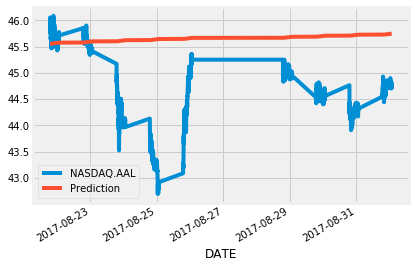

In [54]:
result1.plot()